In [67]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

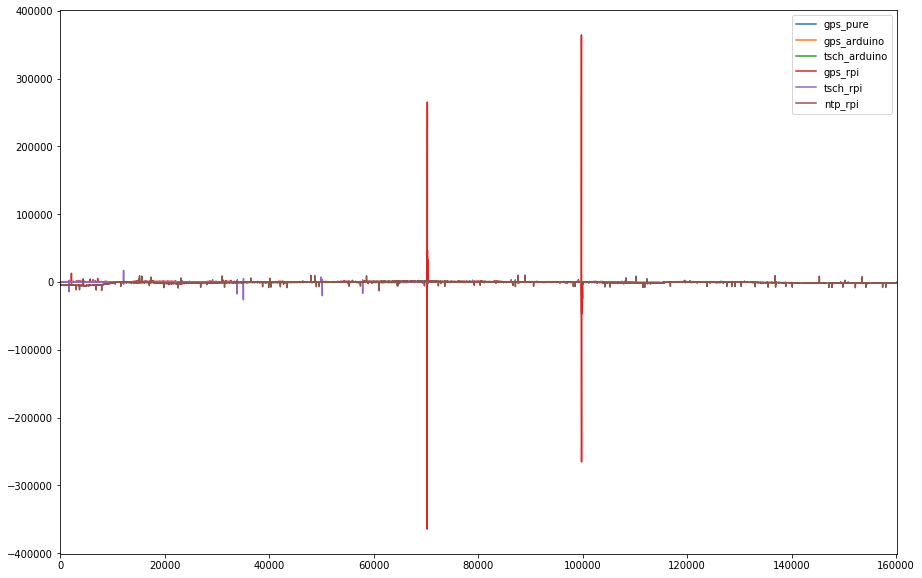

In [68]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib


def load_data(file_name):
    df = pd.read_csv("final_data/" + file_name + ".csv")
    try:
        df.drop(['accumulated_us'], axis=1, inplace=True)
    except:
        pass
    df.rename(columns={df.columns[0]: file_name}, inplace=True)
#     df.columns
    return df

df_list = []

data_source = [ # change the order in this list to change the order of the legend items
    {
        "filename": "gps_pure",
        "legend": "GPS",
        "bin_limit": 0.7,
        "bin_step": 0.008
    }, {
#         "filename": "jitter_arduino",
#         "legend": "Arduino jitter"
#     }, {
        "filename": "gps_arduino",
        "legend": "Arduino + GPS",
        "bin_limit": 20,
        "bin_step": 0.048
    }, {
        "filename": "tsch_arduino",
        "legend":  "Arduino + TSCH",
        "bin_limit": 20,
        "bin_step": 0.048
    }, {
        "filename": "gps_rpi",
        "legend": "rPi + GPS",
        "bin_limit": 300,
        "bin_step": 1
    }, {
        "filename": "tsch_rpi",
        "legend": "rPi + TSCH",
        "bin_limit": 300,
        "bin_step": 1
    }, {
        "filename": "ntp_rpi",
        "legend": "rPi + NTP",
        "bin_limit": 4000,
        "bin_step": 10
    }
]

# data_source = [ # change the order in this list to change the order of the legend items
#     {
#         "filename": "2018-1-9_1.gps_pure",
#         "legend": "GPS"
#     }, {
#         "filename": "2018-1-19_1.gps_arduino",
#         "legend": "Arduino + GPS"
#     }, {
#         "filename": "2018-1-22_1.tsch_arduino",
#         "legend":  "Arduino + TSCH"
#     }, {
#         "filename": "2018-1-9_1.gps_rpi",
#         "legend": "rPi + GPS"
#     }, {
#         "filename": "2018-1-9_1.mote",
#         "legend": "rPi + TSCH"
#     }, {
#         "filename": "ensta_pull_gologic_output-3.0",
#         "legend": "rPi + NTP"
#     }
# ]



params = {}

for item in data_source:
    df = load_data(item["filename"])
    df_list.append(df)
    params[item["filename"]] = item

df = pd.concat(df_list, axis=1)
df.head()

%matplotlib inline
df.plot(figsize=(15,10))

In [69]:
df.count(axis=0)

gps_pure        108169
gps_arduino     114789
tsch_arduino    109693
gps_rpi         108231
tsch_rpi        108232
ntp_rpi         160236
dtype: int64

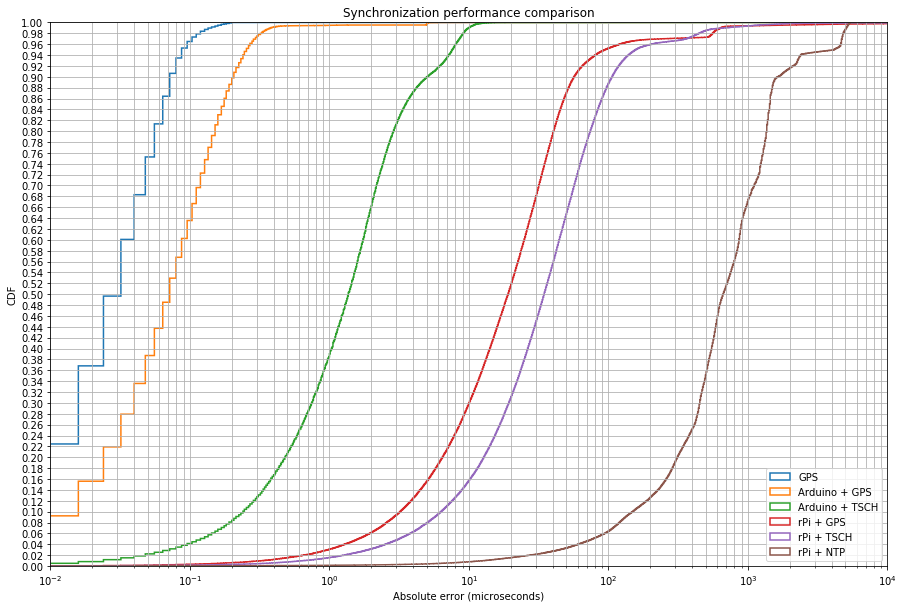

In [70]:
abs_delay = abs(df)

step = 10
# bins = list(np.arange(0,bin_limit,step))
bins = [0] + [10**x for x in np.arange(-3,4,0.005)]
    
if abs_delay.max().max() > bins[-1]:
    bins = bins + [abs_delay.max().max()]
    
# bins = [0,10,20,100,1000000]
    
weights = abs_delay.div(abs_delay.sum(axis=0), axis=1)


plt.figure(figsize=(15,10))
plt.xscale("log")

for column in abs_delay.columns:
    data = abs_delay[column].dropna()
    
    _ = plt.hist(data, bins=bins, weights=np.ones_like(data)/data.count(), cumulative=True, histtype='step', fill=False, linewidth=1.5, alpha=1, label=params[column]["legend"])

# plt.xlim(50,10**4)
# plt.ylim(0.9,1)
plt.xlim(.01,10**4)
plt.ylim(0,1)
plt.xlabel("Absolute error (microseconds)")
plt.ylabel("CDF")
plt.title("Synchronization performance comparison")
plt.legend(loc='lower right')

plt.grid(which="both")

minor_ticks = np.arange(0, 1.01, 0.02) 
_ = plt.yticks(minor_ticks)


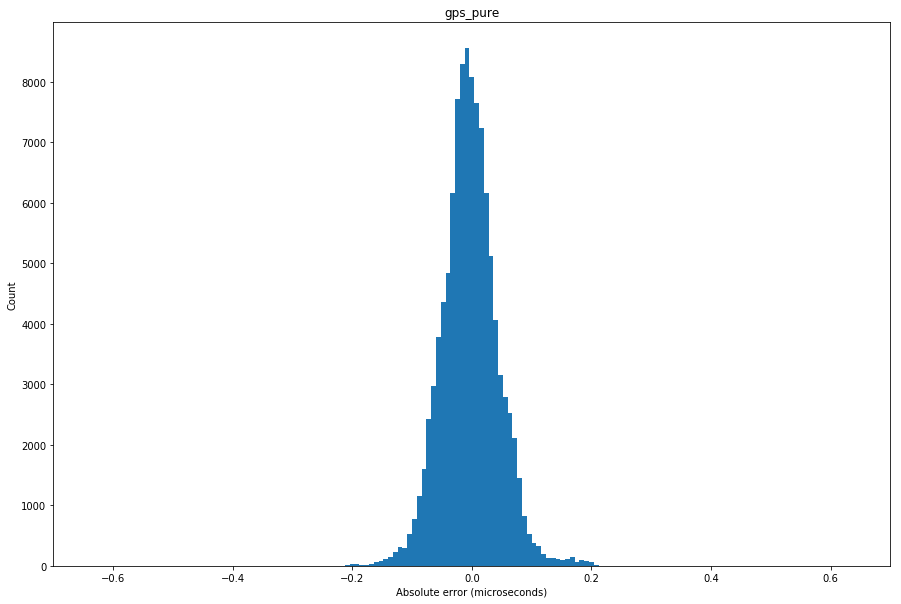

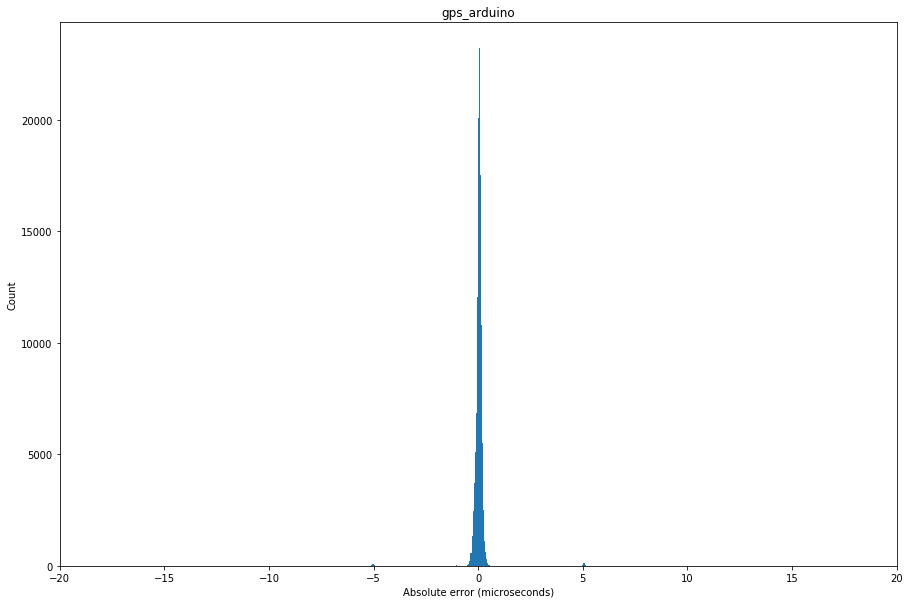

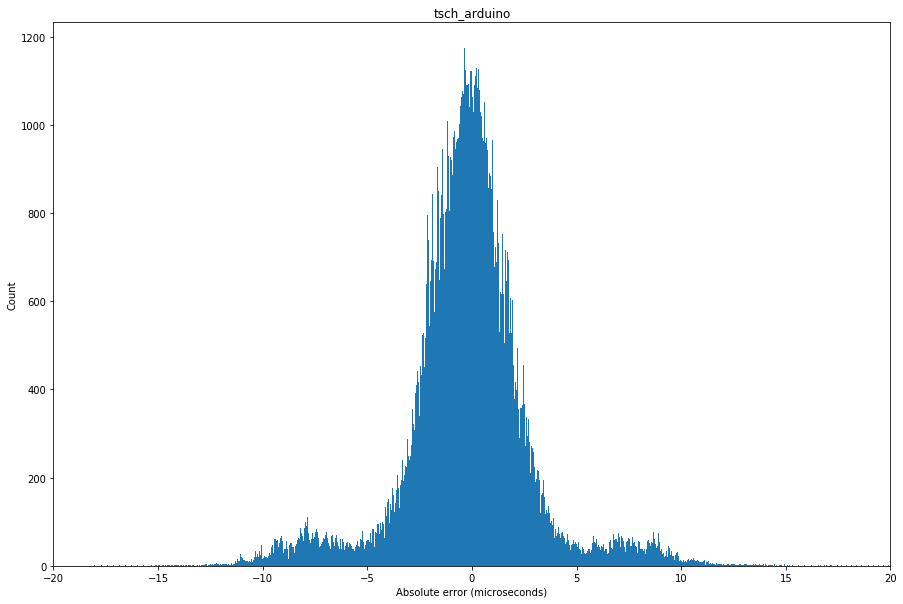

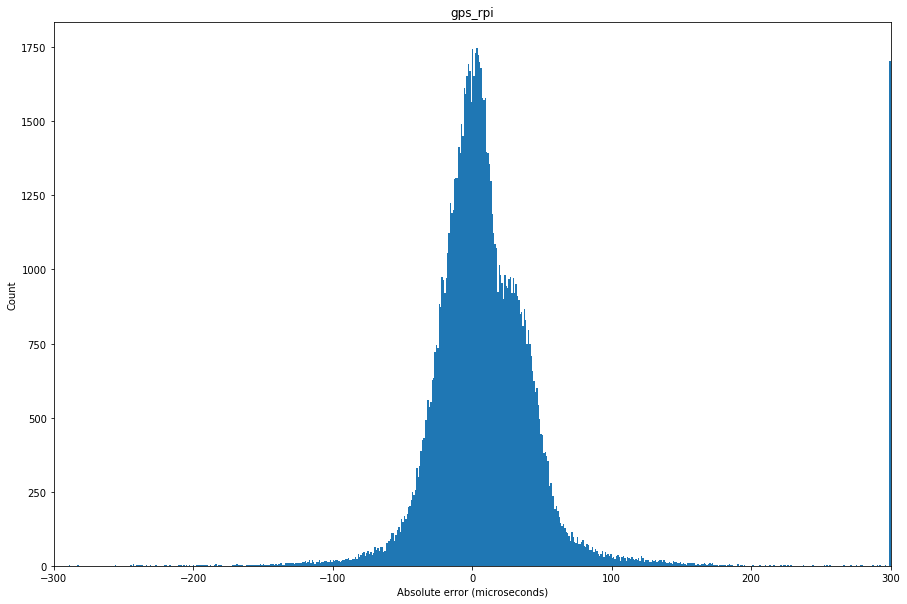

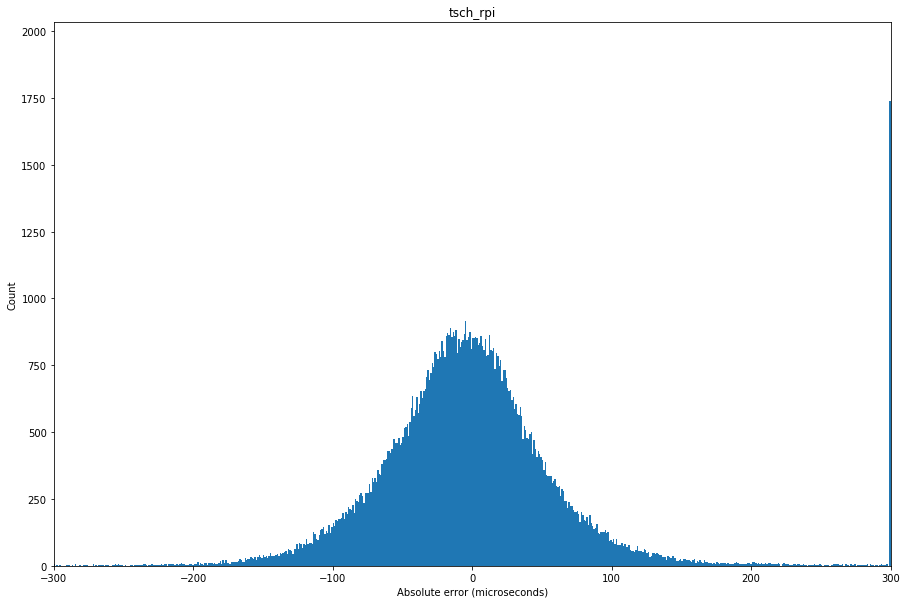

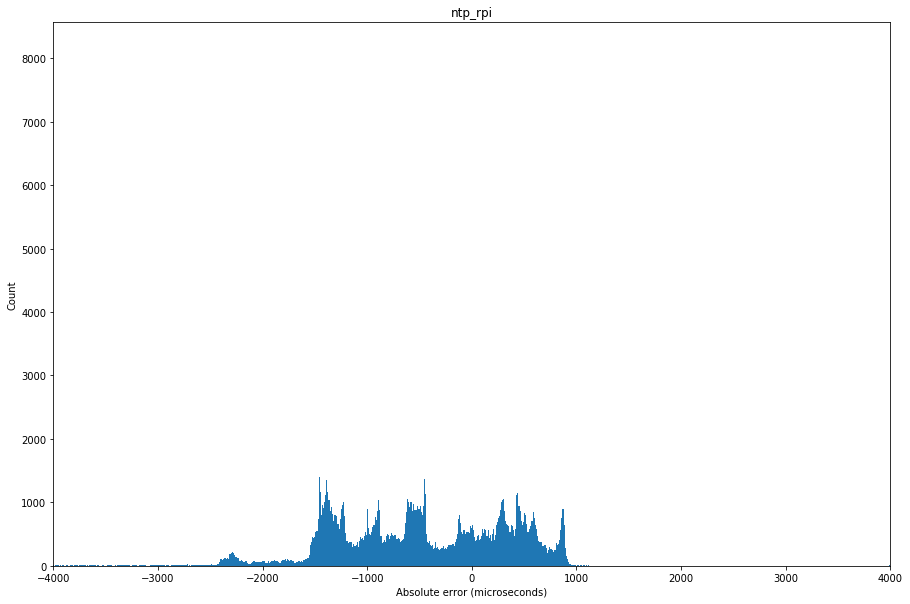

In [71]:
for column in df.columns:
    col_series = df[column].dropna()
    
    bin_limit = params[column]['bin_limit']
    step = params[column]['bin_step']
    bins = list(np.arange(-bin_limit,bin_limit,step))

    if col_series.min() < -bin_limit:
        bins = [col_series.min()] + bins

    if col_series.max() > bin_limit:
        bins = bins + [col_series.max()]


    plt.figure()
    plot = col_series.plot(kind="hist", cumulative=False, bins=bins, figsize=(15,10), density=False)
    # plot.set_xlim(-bin_limit, bin_limit)
    plot.set_xlim(-bin_limit, bin_limit)
    plot.set_xlabel("Absolute error (microseconds)")
    plot.set_ylabel("Count")
    plot.set_title(column)